In [1]:
# import all the neccessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [3]:
# data
data = tf.constant([
    [4,2],
 [4,10],
 [7,4],
 [7,22],
 [8,16],
 [9,10],
 [10,18],
 [10,26],
 [10,34],
 [11,17],
 [11,28],
 [12,14],
 [12,20],
 [12,24],
 [12,28],
 [13,26],
 [13,34],
 [13,34],
 [13,46],
 [14,26],
 [14,36],
 [14,60],
 [14,80],
 [15,20],
 [15,26],
 [15,54],
 [16,32],
 [16,40],
 [17,32],
 [17,40],
 [17,50],
 [18,42],
 [18,56],
 [18,76],
 [18,84],
 [19,36],
 [19,46],
 [19,68],
 [20,32],
 [20,48],
 [20,52],
 [20,56],
 [20,64],
 [22,66],
 [23,54],
 [24,70],
 [24,92],
 [24,93],
 [24,120],
 [25,85]   
    
])

/home/ebiyau/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Stopping distance')

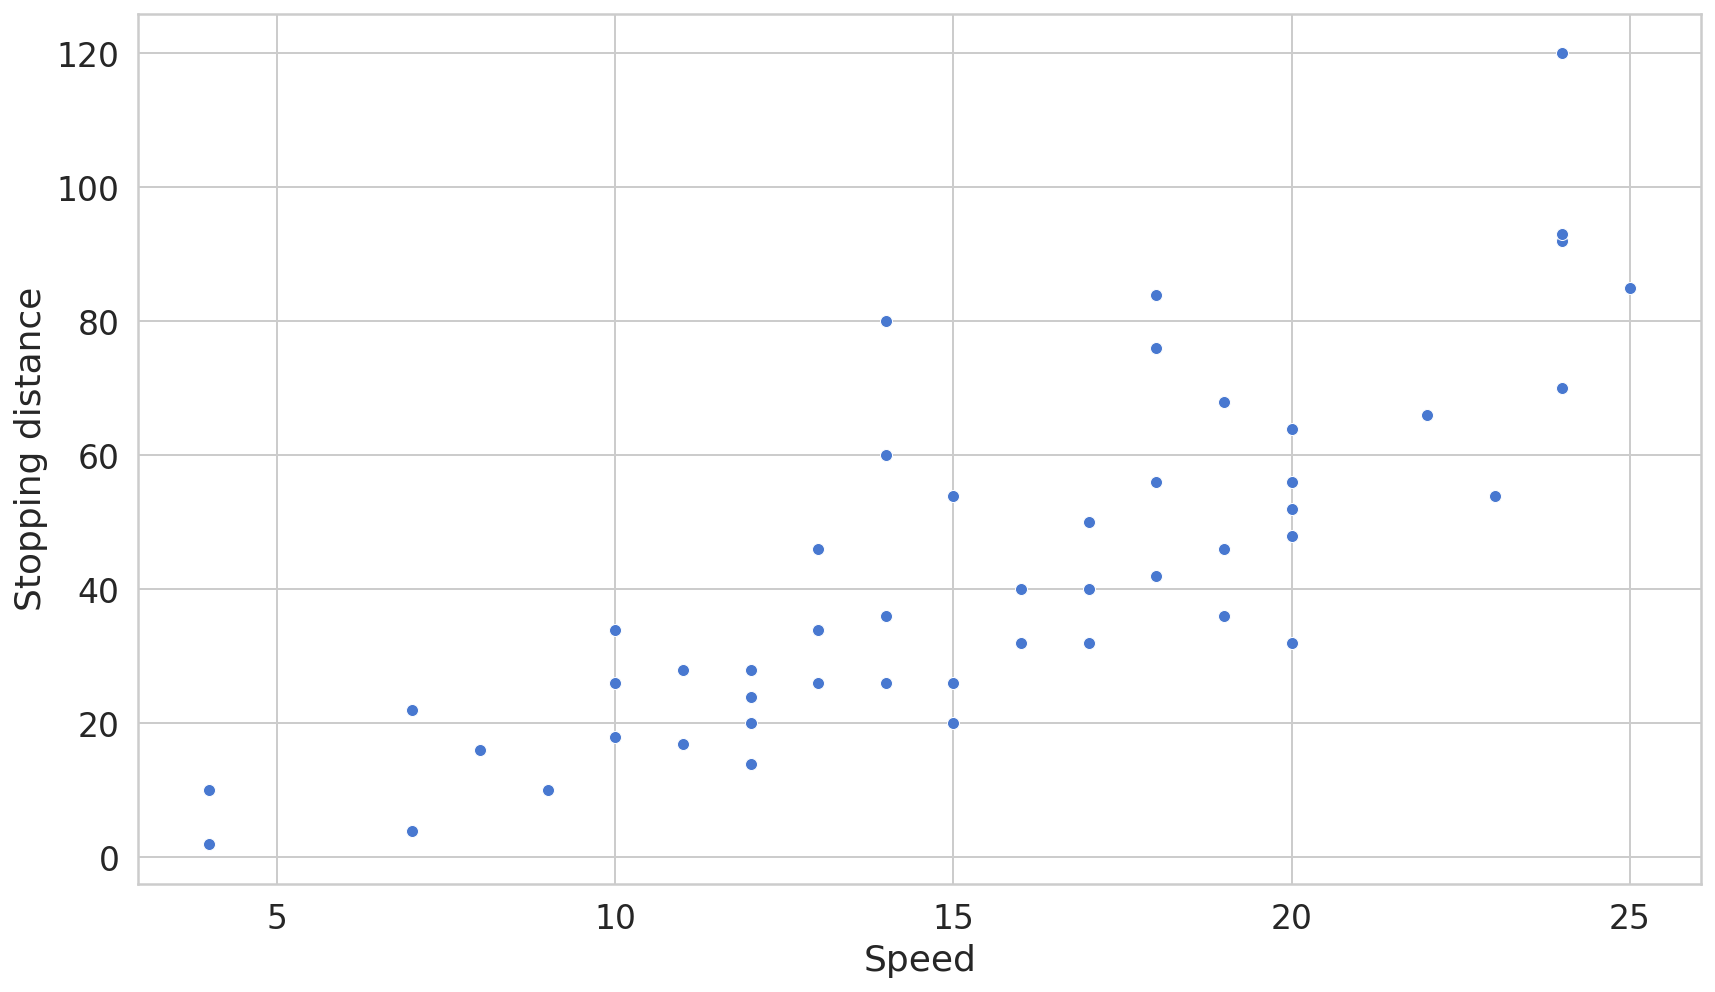

In [4]:
# slice the data to obtain speed--> data[0],
#stoppping_distance --> data [1]
speed = data[:,0]
stopping_distance = data[:,1]

sns.scatterplot(speed,stopping_distance);
plt.xlabel("Speed")
plt.ylabel("Stopping distance")

In [5]:
# create a simple regression model
lin_reg = keras.Sequential([
    layers.Dense(1,activation='linear',input_shape=[1]),
])
optimizer = tf.keras.optimizers.RMSprop(0.001)
lin_reg.compile(
loss = 'mse',
optimizer = optimizer,
metrics= ['mse']
)

In [6]:
# train the model for 1000 epochs
history = lin_reg.fit(
x=speed,
y=stopping_distance,
shuffle=True,
epochs=1000,
validation_split=0.2,
verbose=0)

In [7]:
# visualize the errors

def visualize_error(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.plot(hist['epoch'], hist['mse'],
            label='Train Error')
    
    plt.plot(hist['epoch'], hist['val_mse'],
            label = 'Val_Error')
    
    plt.legend()
    plt.show()

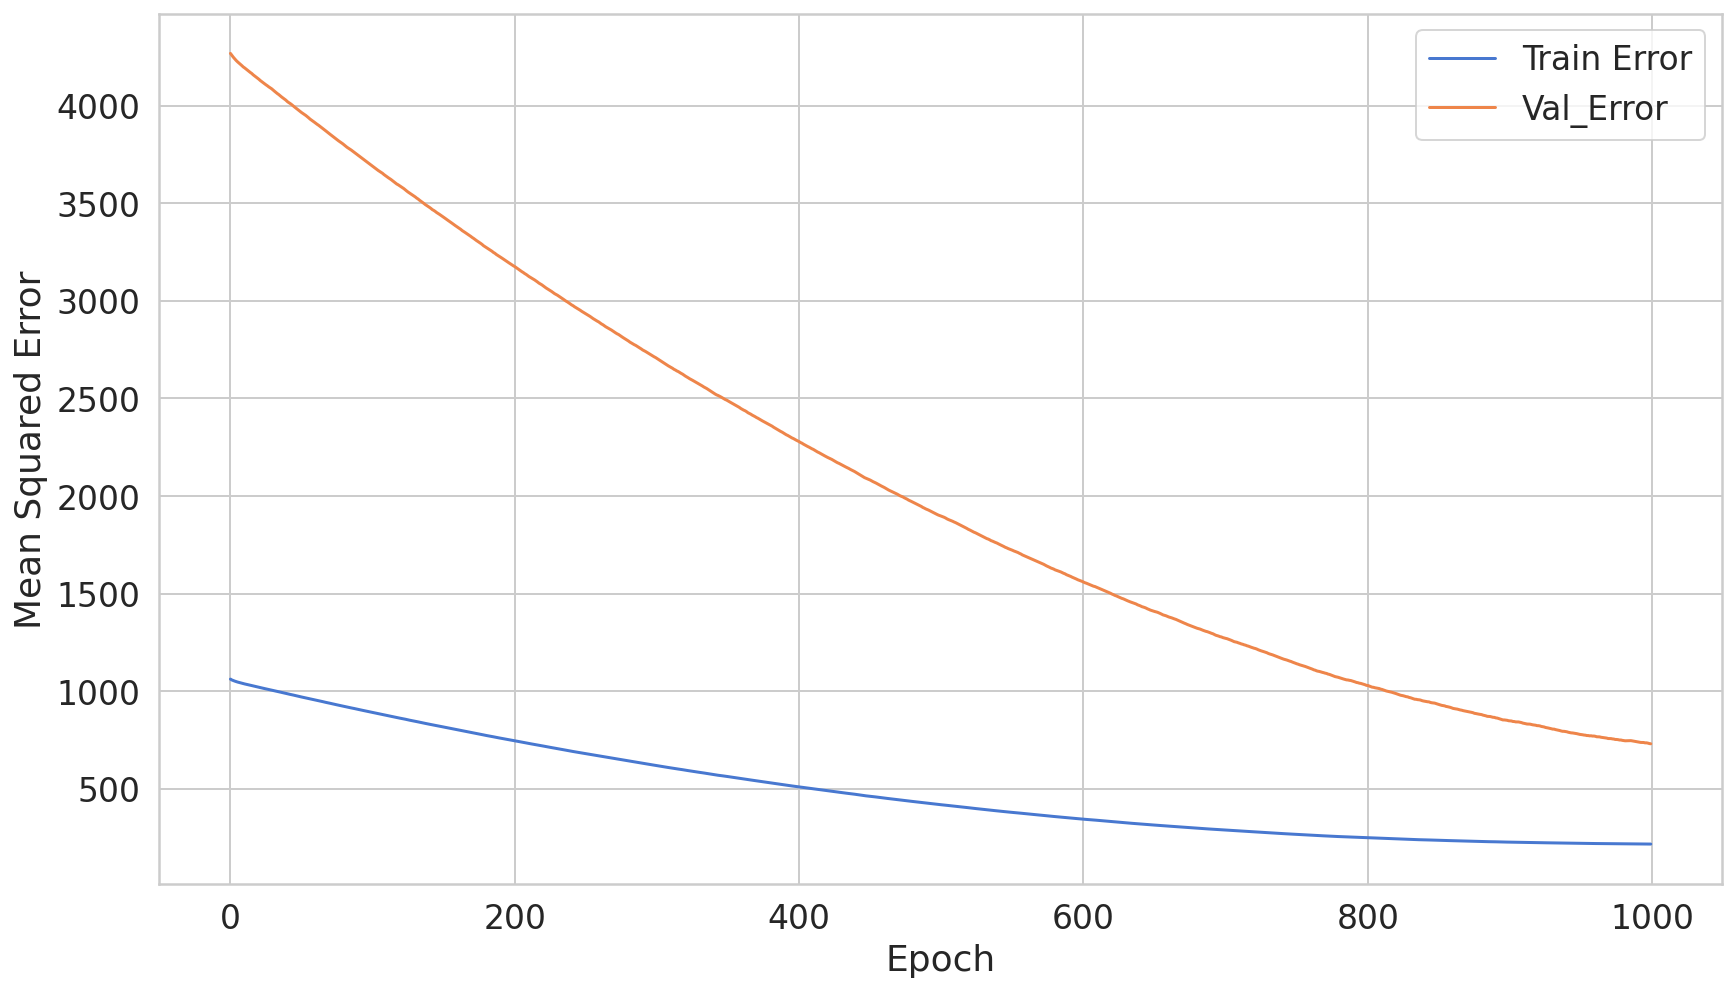

In [8]:
visualize_error(history)

In [9]:
lin_reg.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [10]:
# using neural networks

def build_neural_net():
    
    net = keras.Sequential([
        layers.Dense(32,activation='relu',input_shape=[1]),
        layers.Dense(16,activation='relu'),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    net.compile(loss='mse',
               optimizer=optimizer,
               metrics=['mse','accuracy'])
    return net

In [11]:
net = build_neural_net()

In [12]:
history = net.fit(
x=speed,
y=stopping_distance,
shuffle = True,
epochs=1000,
validation_split=0.2,
verbose=0
)

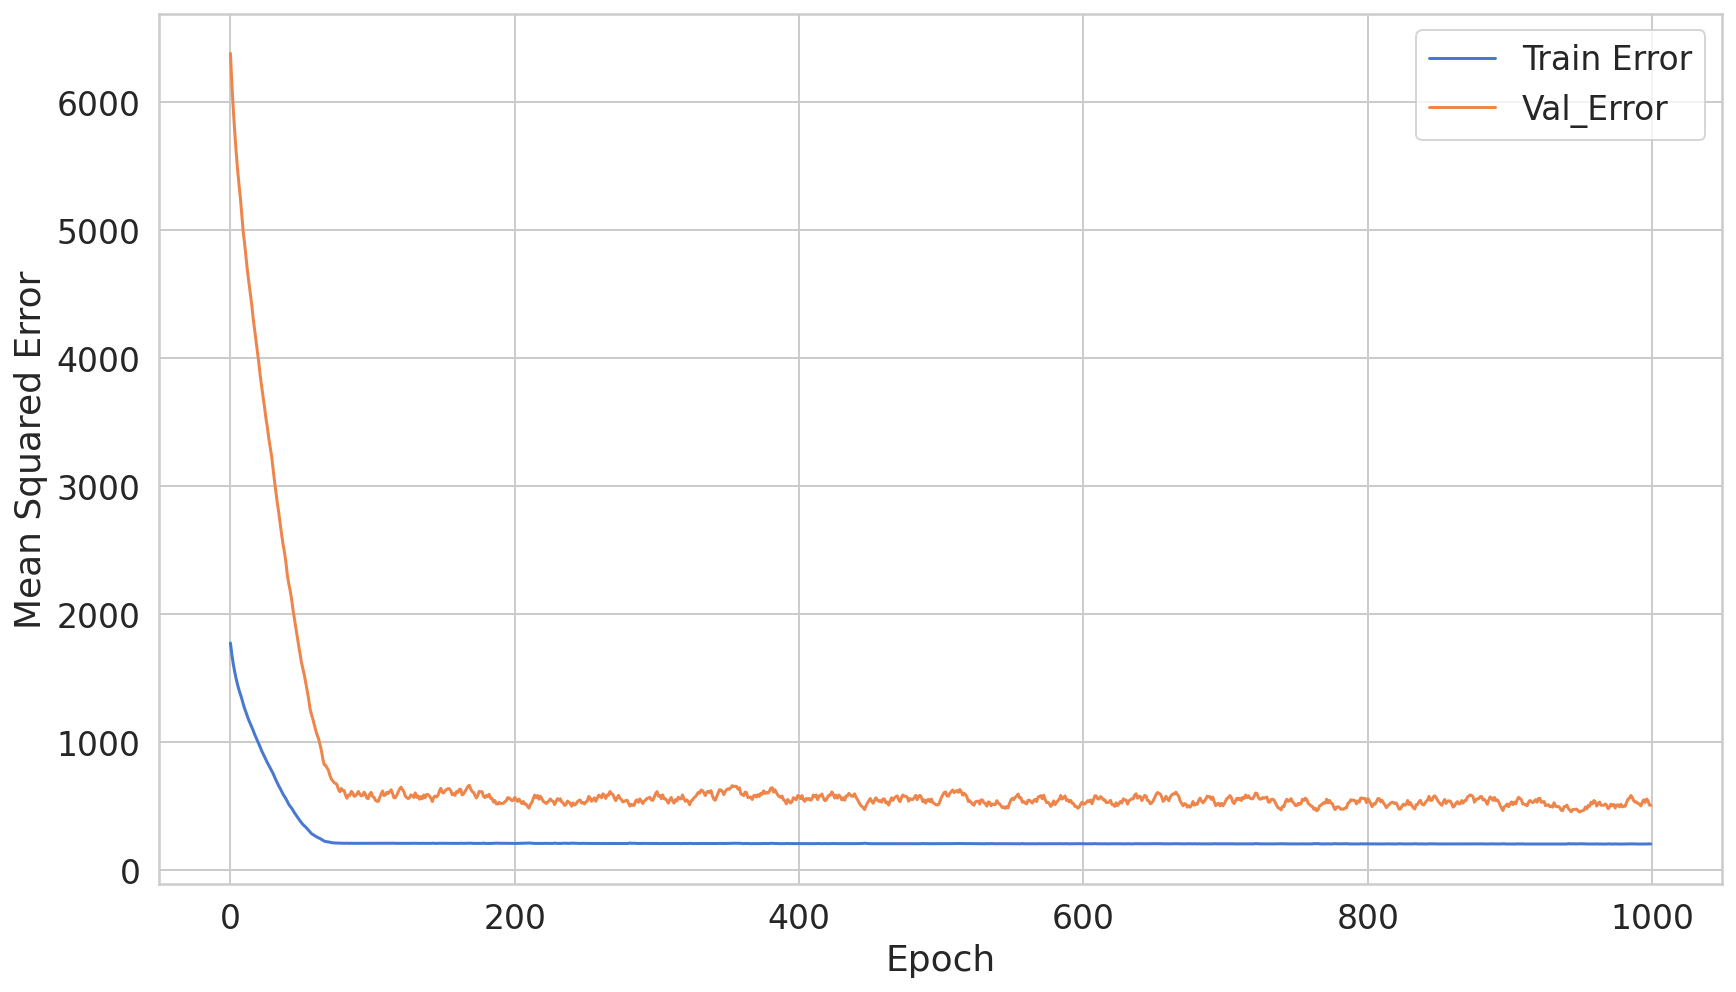

In [13]:
visualize_error(history)

In [16]:
# monitor the val loss and wait for 10 epochs before stopping 
# if there is no change
early_Stop = keras.callbacks.EarlyStopping(
monitor='val_loss',
patience=10    
)


In [18]:
net = build_neural_net()

history = net.fit(
  x=speed,
  y=stopping_distance,
  shuffle=True,
  epochs=1000,
  validation_split=0.2,
  verbose=0,
  callbacks=[early_Stop]
)

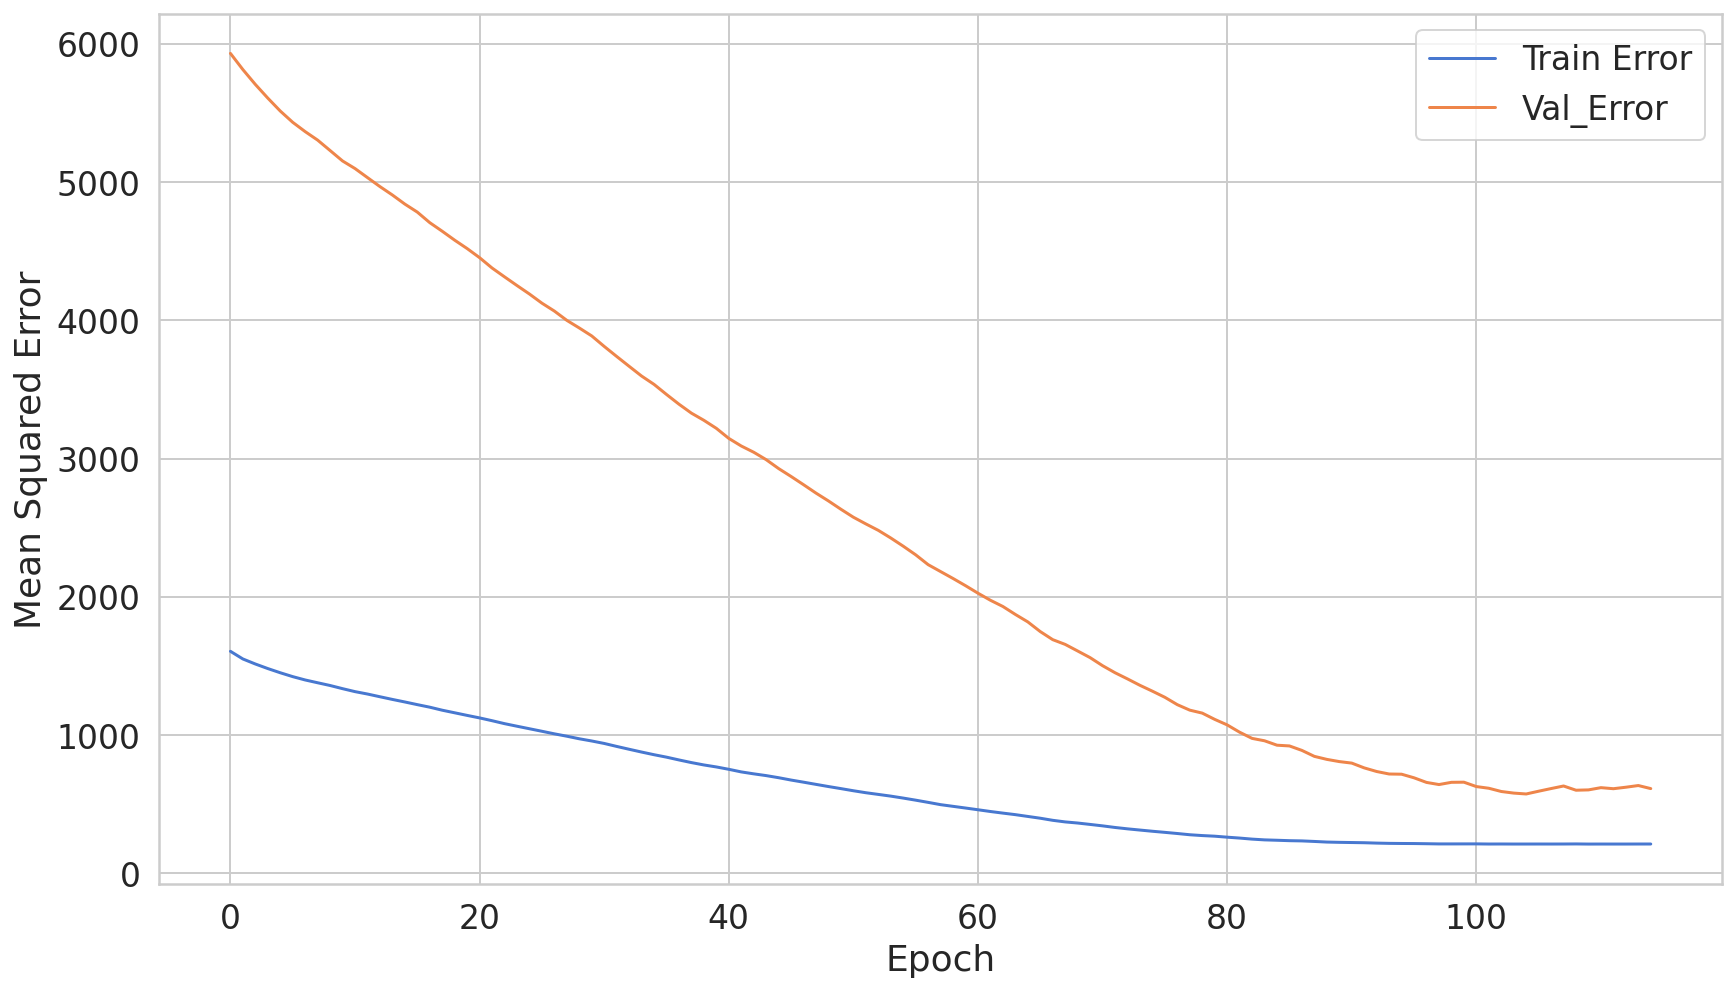

In [19]:
visualize_error(history)

In [20]:
# save the model
net.save('simple_net.h5')
simple_net = keras.models.load_model('simple_net.h5')
simple_net.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                64        
_________________________________________________________________
dense_11 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 17        
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________
